Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, 
personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, 
NY for 2019.

In [1]:
#Import dependencies 
import pandas as pd
import numpy as np 

#Load the CSV file
newyork_data = pd.read_csv("Data/listings.csv",dtype={'neighbourhood': str})
    


In [2]:
# Rename the data 
newyork_data= pd.DataFrame(newyork_data)

newyork_data.rename(columns={"neighbourhood_group": "neighborhood_group",
                            "neighbourhood":"neighborhood"}, inplace= True)

newyork_data.head()

,id,name,host_id,host_name,neighborhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,7/14/19,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,7/26/19,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/18,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,7/21/19,0.60,1,127


In [5]:
averages = pd.DataFrame(columns=['neighborhood', 'price'])

for name, group in newyork_data.groupby('neighborhood'):
    averages.loc[len(averages)] = [name, group['price'].mean()]
    
averages.rename(columns={"price": "avg_price"}, inplace=True)
averages.head()

,neighborhood,avg_price
0,Allerton,91.365854
1,Arden Heights,67.250000
2,Arrochar,112.304348
3,Arverne,173.488372
4,Astoria,114.154428


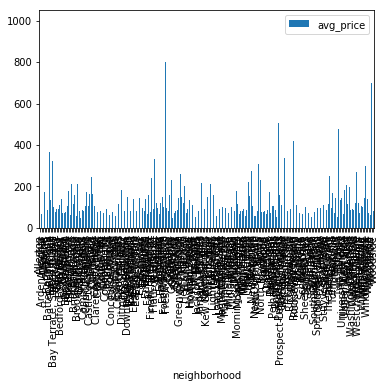

In [6]:
import matplotlib.pyplot as plt
averages.plot(x='neighborhood', y='avg_price', kind='bar')
plt.show()
averages.to_csv('averages.csv', index=False)

In [95]:
review_data = pd.DataFrame(columns=['neighborhood', 'number_of_reviews'])

for name, group in newyork_data.groupby('neighborhood'):
    review_data.loc[len(review_data)] = [name, group['number_of_reviews'].count()]


# review_data.to_csv('review_data.csv', index=False)
review_data.head()

,neighborhood,number_of_reviews
0,Allerton,41
1,Arden Heights,4
2,Arrochar,23
3,Arverne,86
4,Astoria,926


In [90]:
estimate = newyork_data[['latitude','longitude', 'price','reviews_per_month']]
estimate['price'] = estimate['price'].replace( '[\$,)]','', regex=True ).astype(float)
estimate['reviews_per_month'].fillna(0,inplace=True)
eatimate = estimate[np.isfinite(estimate['price'])]
eatimate.head()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,latitude,longitude,price,reviews_per_month
0,40.75362,-73.98377,225.0,0.39
1,40.80902,-73.94190,150.0,0.00
2,40.68514,-73.95976,89.0,4.64
3,40.79851,-73.94399,80.0,0.10
4,40.74767,-73.97500,200.0,0.60


In [91]:
estimate.to_csv('estimate.csv', index=False)

In [92]:
averages.to_json(orient='records')

'[{"neighborhood":"Allerton","avg_price":91.3658536585},{"neighborhood":"Arden Heights","avg_price":67.25},{"neighborhood":"Arrochar","avg_price":112.3043478261},{"neighborhood":"Arverne","avg_price":173.488372093},{"neighborhood":"Astoria","avg_price":114.1544276458},{"neighborhood":"Bath Beach","avg_price":84.5},{"neighborhood":"Battery Park City","avg_price":365.25},{"neighborhood":"Bay Ridge","avg_price":135.5705521472},{"neighborhood":"Bay Terrace","avg_price":322.7142857143},{"neighborhood":"Bay Terrace, Staten Island","avg_price":102.5},{"neighborhood":"Baychester","avg_price":75.4285714286},{"neighborhood":"Bayside","avg_price":90.6153846154},{"neighborhood":"Bayswater","avg_price":88.7222222222},{"neighborhood":"Bedford-Stuyvesant","avg_price":107.8173612955},{"neighborhood":"Belle Harbor","avg_price":139.6666666667},{"neighborhood":"Bellerose","avg_price":72.3636363636},{"neighborhood":"Belmont","avg_price":73.2413793103},{"neighborhood":"Bensonhurst","avg_price":74.604938271

In [93]:
estimate = pd.DataFrame(columns=['neighborhood_group', 'reviews_per_month'])

for name, group in newyork_data.groupby('neighborhood_group'):
    monthly.loc[len(monthly)] = [name, group['reviews_per_month'].mean()]
    
monthly.to_json(orient='records')

'[{"neighbourhood_group":"Bronx","reviews_per_month":1.8118630752},{"neighbourhood_group":"Brooklyn","reviews_per_month":1.2889103188},{"neighbourhood_group":"Manhattan","reviews_per_month":1.2363742904},{"neighbourhood_group":"Queens","reviews_per_month":1.964027689},{"neighbourhood_group":"Staten Island","reviews_per_month":1.8959756098},{"neighbourhood_group":"Bronx","reviews_per_month":1.8118630752},{"neighbourhood_group":"Brooklyn","reviews_per_month":1.2889103188},{"neighbourhood_group":"Manhattan","reviews_per_month":1.2363742904},{"neighbourhood_group":"Queens","reviews_per_month":1.964027689},{"neighbourhood_group":"Staten Island","reviews_per_month":1.8959756098}]'